# Physics 261: Class 24
## 29 March 2024
<hr style="border-top: 1px solid purple; margin-top: 1px; border: 3px solid purple"></hr>
 The goals for today:

    1. Check in for competion of Class23 work
    2. Misc topics I: How to quickly solve a simple resistor & battery circuit
    3. Misc topics II: Test.jl 
    4. Misc topics III: MatecDev - Julia blog site (and soon to be a book)
    
<hr style="margin-bottom: 1px; border: 3px solid purple"></hr>


# Misc Topic I: Solving Kirchoff's laws with Julia
For a simple battery and loop circuit shown below:

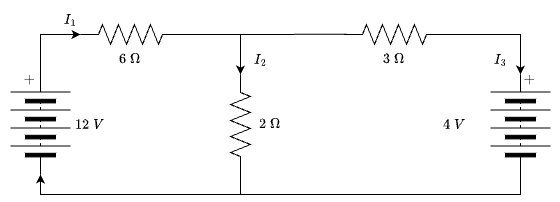

let's use Kirchoff's law to write down three loop equations:

$$
\begin{eqnarray}
+12 -6I_1 -2I_2 = 0\\
12 - 6I_1 -3I_3 -4 = 0\\
+2I_2 - 3I_3 -4 = 0 \\
\end{eqnarray}
$$
or, rearranging,
$$
\begin{eqnarray}
6I_1 +2I_2 + 0I_3 = 12\\
6I_1 + 0I_2+ 3I_2 = 8\\
0I_1 +2I_2 -3I_3 = 4\\
\end{eqnarray}
$$
and now, in matrix form:
$$
\begin{bmatrix}
6 & 2 & 0\\
6 & 0 & 3\\
0 & 2 & -3\\
\end{bmatrix}
\begin{bmatrix}
I_1\\
I_2\\
I_3\\
\end{bmatrix}
= \begin{bmatrix}
12\\
8\\
4\\
\end{bmatrix}
$$
This matrix equation is of the form $\underset{~}{A}\vec{I} = \vec{V}$, so if you were to solve for $\vec{I}$ as if it was a simple variable, you would write 
$$ I = \vec{V}/\underset{~}{A}$$

Onbe might hope this would carry over to a similar thing in Julia, but alas, in Julia, we solve this equation by defining the matrix $\underset{~}{A}$ and the vector $\vec{V}$ and typing 
```julia 
I = A \ V
```

In [2]:
A = [6 2 0; 6 0 3; 0 2 -3]
V = [12; 8;4];

In [3]:
I = A \ V

LoadError: LinearAlgebra.SingularException(3)

Because the determinant was zero, this method won't work. But we can use the node rule for currents
to write 
$$ I_1 = I_2 + I_3$$ 
to eliminate (for instance) $I_3$ and reduce the set of three equation to 
$$
\begin{bmatrix}
6 & 2 \\
-3 & 5 \\
\end{bmatrix}
\begin{bmatrix}
I_1\\
I_2\\
\end{bmatrix}
= \begin{bmatrix}
12\\
4\\
\end{bmatrix}
$$
Now, our method will work just fine:

In [6]:
A = [6 2; -3 5]
V = [12; 4];

In [7]:
I = A \ V

2-element Vector{Float64}:
 1.4444444444444444
 1.6666666666666667

Notice that since $I_1 = I_2 + I_3$, the solution implies that $I_3 = I_1 - I_2 = -0.2222\;\mathrm{amps}$, telling us that we had guessed the direction of 
the current $I_3$ backwards. Our problem is now solved.

# Using Test.jl to test code

In [8]:
using Test

In [9]:
@test 1 ≈ 0.9999 atol = 0.001

Test Passed

There are many options in this package to test code. Especially useful are testsets:

In [10]:
f(x) = x^2

f (generic function with 1 method)

In [11]:
@testset verbose = true "My Set of Set tests" begin
    @testset "silly numerical tests" begin
        @test π ≈ 3.141 atol = 0.00001
        @test sin(π) ≈ 0 atol = 0.0001
    end
    @testset "one more set" begin
        @test f(2) ≈ 4.0 atol=0.01
        @test f(3) ≈ 9.0 atol = 0.01
    end
end;

silly numerical tests: Test Failed at In[11]:3
  Expression: ≈(π, 3.141, atol = 1.0e-5)
   Evaluated: π ≈ 3.141 (atol=1.0e-5)

Stacktrace:
 [1] macro expansion
   @ ~/.julia/juliaup/julia-1.10.2+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/Test/src/Test.jl:672 [inlined]
 [2] macro expansion
   @ In[11]:3 [inlined]
 [3] macro expansion
   @ ~/.julia/juliaup/julia-1.10.2+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/Test/src/Test.jl:1577 [inlined]
 [4] macro expansion
   @ In[11]:3 [inlined]
 [5] macro expansion
   @ ~/.julia/juliaup/julia-1.10.2+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/Test/src/Test.jl:1577 [inlined]
 [6] top-level scope
   @ In[11]:2
Test Summary:           | Pass  Fail  Total  Time
My Set of Set tests     |    3     1      4  0.6s
  silly numerical tests |    1     1      2  0.6s
  one more set          |    2            2  0.0s


LoadError: [91mSome tests did not pass: 3 passed, 1 failed, 0 errored, 0 broken.[39m

You can see that one test failed, and you can see that Test.jl tells you which one. If you end up writing lonnger pieces of code, 
or creating a Julia package, you will have to use tests as part of the code validation. 

## MatecDev.com
This well-written and occassionally updated site is by Martin D. Maas, Ph.D, an applied mathematician from Argentina. 
He has an excellent (albeit short) [Intro to Julia tutorial](https://www.matecdev.com/posts/julia-tutorial-science-engineering.html) and will
be publishing a book soon (I hope; based on his website, I think it will be a good text).